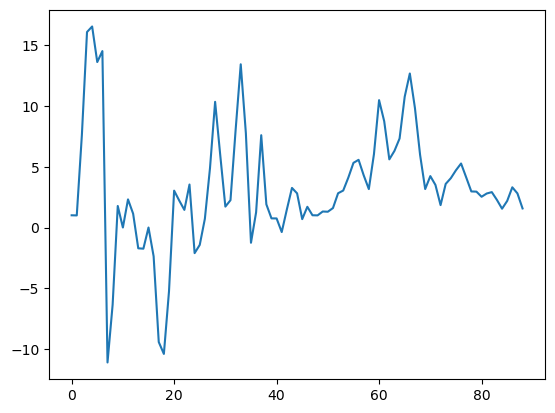

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

datos = pd.read_csv('Session4data.csv', sep=";",decimal=",")
yy = datos.iloc[:,1]

y = yy[0:89] # leave the last 6 observations to compare with the forecasted values

plt.plot(y)
plt.show()

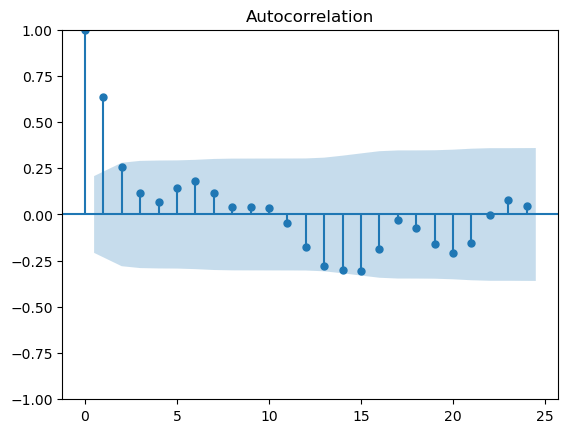

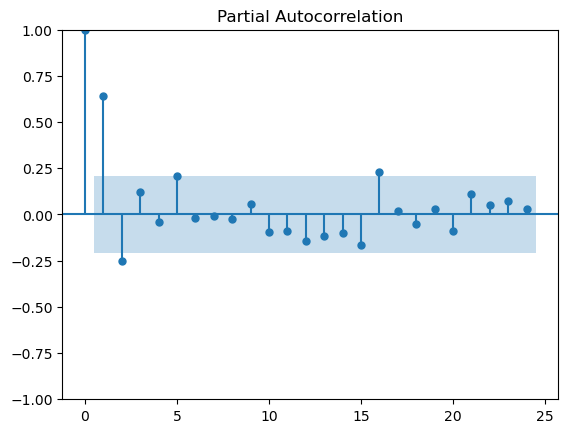

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

nlags = 24 # play with this parameter

## Aquí si pongo 72 en nlags me da este error:
# ValueError: Can only compute partial correlations for lags up to 50% of the sample size.
# The requested nlags 72 must be < 48.
plot_acf(y, lags = nlags)
plt.show()

plot_pacf(y, lags = nlags,method="ols")
plt.show()

In [10]:
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("Statistic:" , adf_test[0])
print("p-value:" , adf_test[1])

adf_test (-3.1137167859379784, 0.025554598148073704, 5, 83, {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}, 359.0430570006344)
Statistic: -3.1137167859379784
p-value: 0.025554598148073704


                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                   89
Model:                          ARIMA   Log Likelihood                -268.042
Date:                Tue, 10 Oct 2023   AIC                            540.084
Time:                        10:47:30   BIC                            545.061
Sample:                             0   HQIC                           542.090
                                 - 89                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2583      0.522      6.245      0.000       2.236       4.281
sigma2        24.1801      2.710      8.921      0.000      18.868      29.492
Ljung-Box (L1) (Q):                  37.50   Jarque-

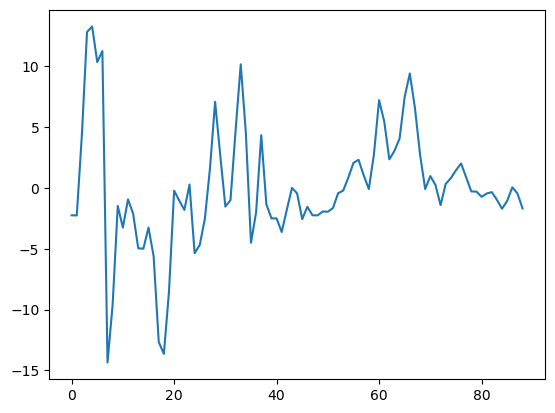

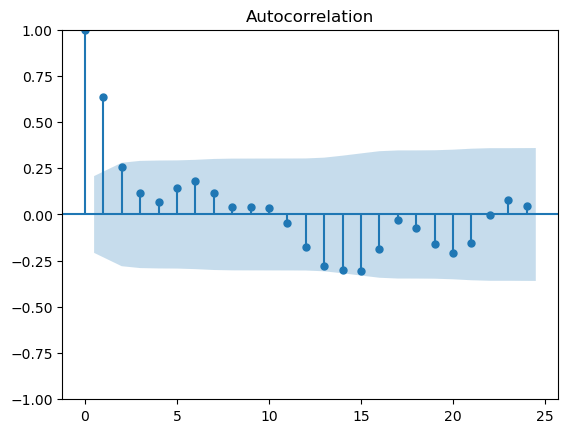

C:\Users\lpascual\AppData\Local\anaconda3_v2\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


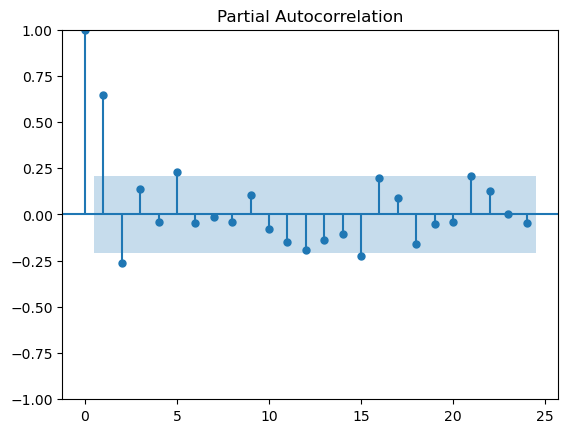

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fit = ARIMA(y, order = (0,0,0))
fit_fit=fit.fit()
print(fit_fit.summary())
# print("Coefficients",fit_fit.params)

residuos=fit_fit.resid

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, lags = nlags)
plt.show()

In [12]:
adf_test = sm.tsa.stattools.adfuller(residuos,maxlag=10) 
print("adf_test", adf_test) # first output "The test statistic", second output "p-value"

adf_test (-3.916204043819239, 0.001918778331837638, 4, 84, {'1%': -3.510711795769895, '5%': -2.8966159448223734, '10%': -2.5854823866213152}, 357.51778005452013)


LjungBox       lb_stat  lb_pvalue
20  21.314572   0.378829
Shapiro ShapiroResult(statistic=0.8471417427062988, pvalue=3.832743189491339e-08)


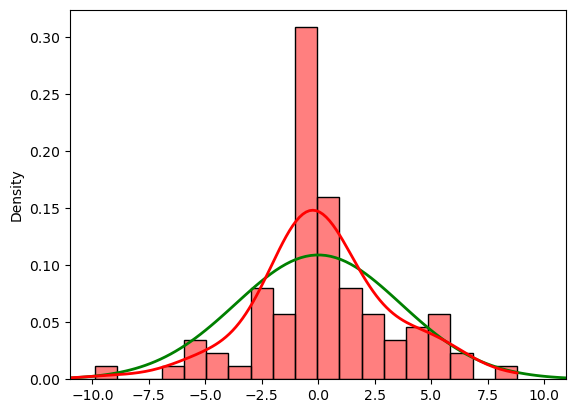

In [14]:
# Box test

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[20])

print("LjungBox", box_test) # first output "The test statistic", second output "p-value"

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapiro", saphiro) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -3*sigma, mu +3*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = sns.histplot(residuos, stat="density", color = "r",
                  kde = True, line_kws={'lw': 2}, bins = 30
                   ) # NEW

# ax = plt.hist(residuos,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
# ax = sns.distplot(residuos, hist = False, kde = True,
#                  kde_kws = {'linewidth': 2}, color = "blue") # OLD-DEPRECATED


ax.set_xlim(mean - 3*std, mean + 3*std)

plt.show()

point predictions 
 89    3.258272
90    3.258272
91    3.258272
92    3.258272
93    3.258272
94    3.258272
95    3.258272
Name: predicted_mean, dtype: float64
forecasting errors 
 89   -1.004810
90   -0.630070
91    0.073634
92   -0.083402
93   -0.470124
94    0.528267
95   -3.630538
dtype: float64


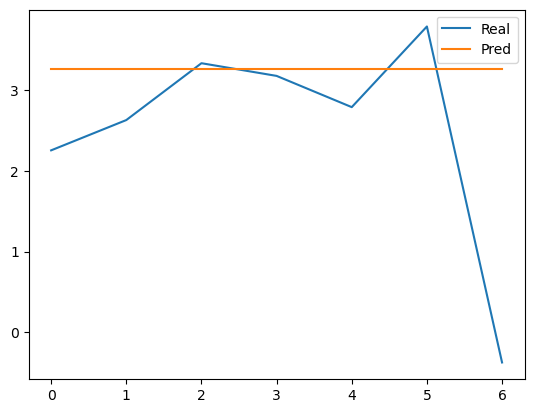

In [20]:
y_pred = fit_fit.forecast(steps = 7) # OUT-OF-SAMPLE
res = yy[-7:] - y_pred 
print("point predictions",'\n', y_pred)
print("forecasting errors",'\n', res)

real =yy[-7:].reset_index(drop=True)
plt.plot(real, label = 'Real')
plt.plot(y_pred.reset_index(drop=True), label = 'Pred')
plt.legend()
plt.show()